# Data visualization with Pandas (matplotlib)

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['font.sans-serif'].insert(0, 'Noto Sans CJK TC')

## Lottery dataset

In [2]:
lottery = pd.read_csv('http://bit.ly/lottery-wide')
lottery.head(10)

,Date,X1,X2,X3,X4,X5,X6,S
0,105/08/12,8,35,43,33,20,42,10
1,105/08/09,15,37,35,17,45,30,41
2,105/08/05,27,40,2,35,22,1,33
3,105/08/02,15,4,20,22,28,29,1
4,105/07/29,28,9,27,15,30,41,13
5,105/07/26,35,41,19,22,9,15,37
6,105/07/22,17,10,33,2,49,27,15
7,105/07/19,7,46,40,33,45,13,39
8,105/07/15,29,24,25,35,33,38,49
9,105/07/12,42,31,46,43,25,34,5


#### Pandas - Apply function to a Series or DataFrame

- **map**: (Series method) recode existing values to a different set of values
- **apply**: (Series method and DataFrame method) apply function to each element of series
- **applymap**: (DataFrame method) apply function to every element of a Dataframe

In [3]:
def to_date(x):
    # x = '105/07/12'
    x_list = x.split('/')
    x_list[0] = str(int(x_list[0]) + 1911)
    return pd.to_datetime('-'.join(x_list))

In [4]:
lottery['Date'] = lottery.Date.map(to_date)
lottery.set_index('Date', inplace=True)
lottery.head()

,X1,X2,X3,X4,X5,X6,S
Date,,,,,,,
2016-08-12,8,35,43,33,20,42,10
2016-08-09,15,37,35,17,45,30,41
2016-08-05,27,40,2,35,22,1,33
2016-08-02,15,4,20,22,28,29,1
2016-07-29,28,9,27,15,30,41,13


### Plot directly?

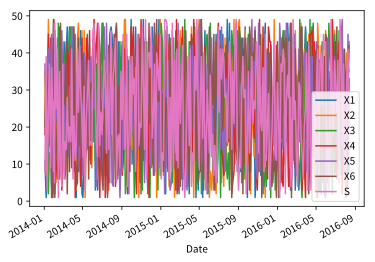

In [5]:
# Not what we want
lottery.plot()

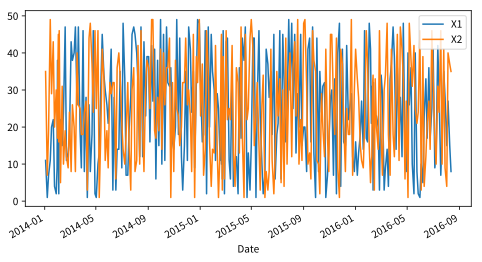

In [6]:
# Not what we want
lottery.loc[:, ['X1', 'X2']].plot(figsize=(8, 4))

### Aggregation and Pivot

#### 先計算"數字"的數量

In [7]:
lottery_lng = lottery.stack().reset_index()
lottery_lng.columns = ['date', 'ball_type', 'ball_value']
lottery_lng.head()

,date,ball_type,ball_value
0,2016-08-12,X1,8
1,2016-08-12,X2,35
2,2016-08-12,X3,43
3,2016-08-12,X4,33
4,2016-08-12,X5,20


#### 把號碼變成字串

In [8]:
lottery_lng['ball_value'] = lottery_lng['ball_value'].apply(lambda x: f'{x:02d}')
lottery_lng.head()

,date,ball_type,ball_value
0,2016-08-12,X1,08
1,2016-08-12,X2,35
2,2016-08-12,X3,43
3,2016-08-12,X4,33
4,2016-08-12,X5,20


In [9]:
# the same
lottery.loc[:, 'X1':'S'] = lottery.loc[:, 'X1':'S'].applymap(lambda x: f'{x:02d}')
lottery.head()

,X1,X2,X3,X4,X5,X6,S
Date,,,,,,,
2016-08-12,08,35,43,33,20,42,10
2016-08-09,15,37,35,17,45,30,41
2016-08-05,27,40,02,35,22,01,33
2016-08-02,15,04,20,22,28,29,01
2016-07-29,28,09,27,15,30,41,13


### Plot with pandas

#### 哪一顆球開最多次？

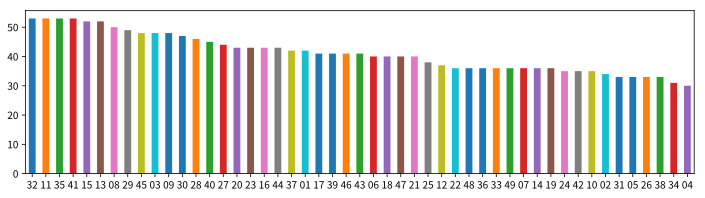

In [10]:
lottery_lng['ball_value'].value_counts(sort=True).plot.bar(rot=0, figsize=(12, 3))

In [11]:
(
    lottery_lng.groupby('ball_value')
    .size()
    .sort_values(ascending=True)
    .head()
)

ball_value
04    30
34    31
05    33
38    33
26    33
dtype: int64

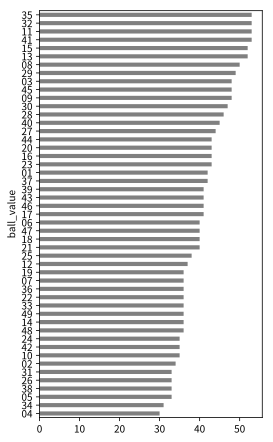

In [12]:
(
    lottery_lng.groupby('ball_value')
    .size()
    .sort_values(ascending=True)
    .plot.barh(rot=0, figsize=(4, 7.5), color='grey')
)

#### 拆分球種

In [28]:
import numpy as np

(
    lottery_lng
    .assign(ball_type=np.where(lottery_lng['ball_type'] == 'S', 'S', 'N'))
    .groupby(['ball_value', 'ball_type'])
    .size()
    .sort_values(ascending=True)
    .unstack()
    .head()
)

ball_type,N,S
ball_value,,
01,38,4
02,32,2
03,40,8
04,25,5
05,28,5


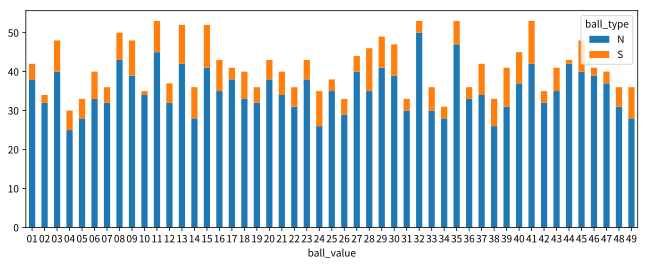

In [30]:
(
    lottery_lng
    .assign(ball_type=np.where(lottery_lng['ball_type'] == 'S', 'S', 'N'))
    .groupby(['ball_value', 'ball_type'])
    .size()
    .sort_values(ascending=True)
    .unstack()
    .plot.bar(stacked=True, figsize=(11, 4), rot=0, legend='right')
)

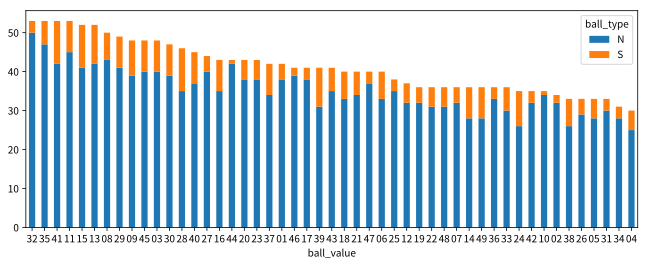

In [31]:
import numpy as np
(
    lottery_lng
    .assign(ball_type=np.where(lottery_lng['ball_type'] == 'S', 'S', 'N'))
    .groupby(['ball_value', 'ball_type'])
    .size()
    .sort_values(ascending=True)
    .unstack()
    .assign(total = lambda df: df.sum(axis=1))
    .sort_values('total', ascending=False)
    .drop('total', axis=1)
    .plot.bar(stacked=True, figsize=(11, 4), rot=0)
)

### 預測下一期

In [17]:
# http://pandas.pydata.org/pandas-docs/version/0.14/cookbook.html#creating-example-data

def expand_grid(data_dict):
    """Create a dataframe from every combination of given values."""
    import itertools
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

In [18]:
def compute_percentage(x):
    pct = float(x/p['score'].sum()) * 100
    return round(pct, 2)

In [ ]:
# df['percentage'] = df.apply(compute_percentage, axis=1)

---

## Salary dataset

In [4]:
salary = pd.read_csv('http://bit.ly/job-salary')
salary.head()

,company_id,crawlSessionId,tag,url,clusterNumber,companyCategory,location,title,type,currency,min_max,price
0,32416,2015122704,Software Engineer,https://angel.co/sharethrough/jobs/15447-data-...,36,行動廣告,San Francisco,Data Engineer,Full Time,USD,max,180000.0
1,32416,2015122704,Software Engineer,https://angel.co/sharethrough/jobs/15447-data-...,36,行動廣告,San Francisco,Data Engineer,Full Time,USD,min,100000.0
2,32416,2015122704,Java,https://angel.co/sharethrough/jobs/15447-data-...,36,行動廣告,San Francisco,Data Engineer,Full Time,USD,max,180000.0
3,32416,2015122704,Java,https://angel.co/sharethrough/jobs/15447-data-...,36,行動廣告,San Francisco,Data Engineer,Full Time,USD,min,100000.0
4,32416,2015122704,Hadoop,https://angel.co/sharethrough/jobs/15447-data-...,36,行動廣告,San Francisco,Data Engineer,Full Time,USD,max,180000.0


In [5]:
salary.currency.unique()

array(['USD', 'INR', 'GBP', 'EUR', 'YEN'], dtype=object)

In [6]:
salary_long = salary.pivot_table(index=['companyCategory', 'company_id', 'title', 
                                        'type', 'location', 'currency', 'tag'], 
                                 columns='min_max', values='price')
salary_long.head(20)

min_max                                                                                                             max  \
companyCategory company_id title                           type      location  currency tag                               
Bigdata         149        Director of Customer Engagement Full Time Remote OK USD      Consulting             180000.0   
                                                                                        Management Consulting  180000.0   
                                                                                        New York City          180000.0   
                                                                                        Pharmaceutical         180000.0   
                                                                                        Product Manager        180000.0   
                                                                                        Project Management     180000.0   
                                                                                        SaaS                   180000.0   
                                                                                        Strategy               180000.0   
                                                                                        System Implementation  180000.0   
                           Technical Sales Engineer        Full Time Remote OK USD      ETL                    110000.0   
                                                                                        New York City          110000.0   
                                                                                        SQL                    110000.0   
                                                                                        Sales Engineering      110000.0   
                                                                                        Salesforce             110000.0   
                                                                                        Software Engineer      110000.0   
                                                                                        Software Engineering   110000.0   
                                                                                        Technical Pre-Sales    110000.0   
                975        Backend Developer               Full Time London    GBP      Amazon Web Services     65000.0   
                                                                                        Backend Developer       65000.0   
                                                                                        Data Science            65000.0   

min_max                                                                                                             min  
companyCategory company_id title                           type      location  currency tag                              
Bigdata         149        Director of Customer Engagement Full Time Remote OK USD      Consulting             160000.0  
                                                                                        Management Consulting  160000.0  
                                                                                        New York City          160000.0  
                                                                                        Pharmaceutical         160000.0  
                                                                                        Product Manager        160000.0  
                                                                                        Project Management     160000.0  
                                                                                        SaaS                   160000.0  
                                                                                        Strategy               160000.0  
                                                                         

### 那一種產業最缺人？

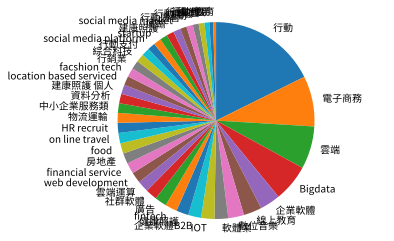

In [23]:
# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.pie.html

ax = (salary['companyCategory']
      .value_counts(ascending=False)
      .plot.pie(counterclock=False, startangle=90))
ax.axis('equal')
ax.set_ylabel('');

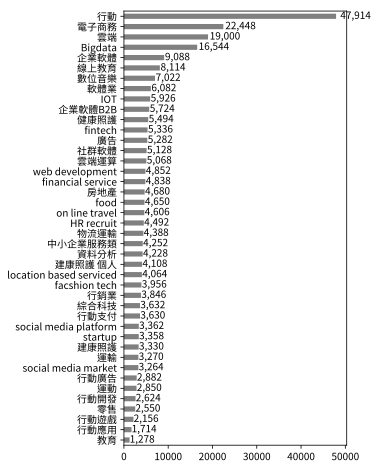

In [24]:
ax = (salary['companyCategory']
      .value_counts(ascending=True)
      .plot.barh(figsize=(4, 8), color='grey'))

for p in ax.patches:
    ax.annotate(f'{p.get_width():,}', (p.get_width() * 1.02, p.get_y()))

#### 每種產業都缺什麼技能的人？

In [25]:
salary_long.head()

min_max                                                                                                             max  \
companyCategory company_id title                           type      location  currency tag                               
Bigdata         149        Director of Customer Engagement Full Time Remote OK USD      Consulting             180000.0   
                                                                                        Management Consulting  180000.0   
                                                                                        New York City          180000.0   
                                                                                        Pharmaceutical         180000.0   
                                                                                        Product Manager        180000.0   

min_max                                                                                                             min  
companyCategory company_id title                           type      location  currency tag                              
Bigdata         149        Director of Customer Engagement Full Time Remote OK USD      Consulting             160000.0  
                                                                                        Management Consulting  160000.0  
                                                                                        New York City          160000.0  
                                                                                        Pharmaceutical         160000.0  
                                                                                        Product Manager        160000.0

In [26]:
salary_long.reset_index(['companyCategory', 'tag']).reset_index(drop=True).head()

min_max,companyCategory,tag,max,min
0,Bigdata,Consulting,180000.0,160000.0
1,Bigdata,Management Consulting,180000.0,160000.0
2,Bigdata,New York City,180000.0,160000.0
3,Bigdata,Pharmaceutical,180000.0,160000.0
4,Bigdata,Product Manager,180000.0,160000.0


In [39]:
salary_skill = (
    salary_long
    .reset_index(['companyCategory', 'tag'])
    .reset_index(drop=True)
    .groupby(['tag', 'companyCategory'])
    .size()
    .unstack(fill_value=0)
    .loc[:, ['行動', '電子商務', '雲端', 'Bigdata']]
)
salary_skill.head()

companyCategory,行動,電子商務,雲端,Bigdata
tag,,,,
Html,0,0,0,0
"Large Datasets, Data Mining",0,0,0,2
Strong Administrative and Organization skills,0,0,1,0
"• Hands On Experience With Bio Analytical Tools (Hplc, Elisa) Preferred.",0,0,0,0
"""Can-Do"" Attitude",0,0,0,0


In [47]:
(
    salary_skill.loc[['Software Engineer', 'Marketing', 'Sales',
                      'Javascript', 'Mobile Developer', 'Full-Stack Developer'],:]
    .style.background_gradient(cmap='summer')
)

companyCategory,行動,電子商務,雲端,Bigdata
tag,,,,
Software Engineer,979,471,465,410
Marketing,701,468,352,129
Sales,585,326,319,223
Javascript,644,314,278,277
Mobile Developer,606,246,190,66
Full-Stack Developer,535,323,260,175


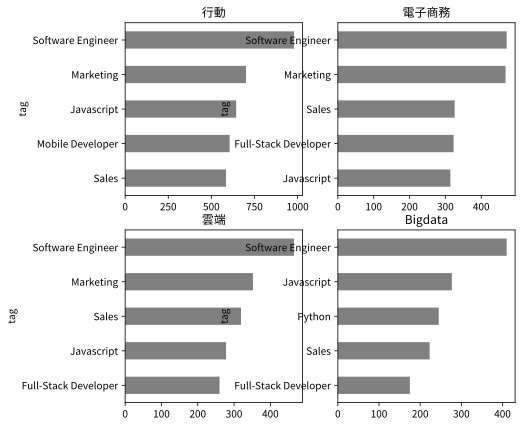

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
axes = axes.flatten()

for i, col in enumerate(salary_skill.columns):
    salary_skill[col].sort_values(ascending=False).head(5).sort_values().plot.barh(
        ax=axes[i],
        title= str(col),
        color='grey'
    )

---

## Reference

- [DataFrame background gradient](https://stackoverflow.com/a/50703596/3744499)
- [Making heatmap from pandas DataFrame](https://stackoverflow.com/a/29528483/3744499)